[View in Colaboratory](https://colab.research.google.com/github/matheus217/projeto-machine-learn/blob/master/Regressao_linear.ipynb)

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import os
import tarfile
from six.moves import urllib

FILE_TO_DOWNLOAD =  "Salary_Data.csv"
DOWNLOAD_ROOT = "https://github.com/ect-info/ml/raw/master/"
DATA_PATH = "dados/"
DATA_URL = DOWNLOAD_ROOT + DATA_PATH + FILE_TO_DOWNLOAD

def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  if not os.path.isdir(data_path):
    os.makedirs(data_path)
  urllib.request.urlretrieve(data_url, data_path+"Salary_Data.csv")
  
  
fetch_data()

# observando se o diretório datasets foi criado com sucesso 
!ls dados

Salary_Data.csv


In [39]:
import pandas as pd

def load_data(data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  csv_path = os.path.join(data_path,file_to_download)
  return pd.read_csv(csv_path)

salary_data = load_data()

salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [0]:
# Separando os dados para a variável independente e para variável dependete 
salary_X = salary_data.iloc[:,:-1].values
salary_Y = salary_data.iloc[:, 1].values

In [41]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [42]:
# Split the data into training/testing sets
salary_X_train = salary_X[:-20]
print(salary_X_train);
salary_X_test = salary_X[-20:]
print(salary_X_test);

# Split the targets into training/testing sets
salary_Y_train = salary_Y[:-20]
salary_Y_test = salary_Y[-20:]

[[1.1]
 [1.3]
 [1.5]
 [2. ]
 [2.2]
 [2.9]
 [3. ]
 [3.2]
 [3.2]
 [3.7]]
[[ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [0]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [44]:
# Train the model using the training sets
regr.fit(salary_X_train, salary_Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
# Make predictions using the testing set
salary_Y_pred = regr.predict(salary_X_test)

In [46]:
# The coefficients
print('Coefficients:');
print( regr.coef_);
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(salary_Y_test, salary_Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(salary_Y_test, salary_Y_pred))

Coefficients:
[9020.63559888]
Mean squared error: 37067616.13
Variance score: 0.93


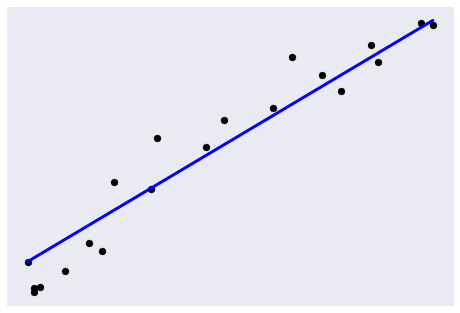

In [47]:
# Plot outputs
plt.scatter(salary_X_test, salary_Y_test,  color='black')
plt.plot(salary_X_test, salary_Y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [48]:
print(salary_Y_pred);

[ 63397.34704233  64299.41060222  64299.41060222  65201.4741621
  68809.72840166  72417.98264121  74222.10976098  76026.23688076
  81438.61824009  82340.68179997  89557.19027908  92263.38095874
  99479.88943784 102186.08011751 106696.39791694 109402.58859661
 113912.90639605 114814.96995594 121129.41487515 122933.54199493]
